In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
bitcoin=pd.read_csv("C:/Users/Bernardos/Documents/gnof_data/BTC-EUR.csv",index_col='Date',parse_dates=True )
bitcoin.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


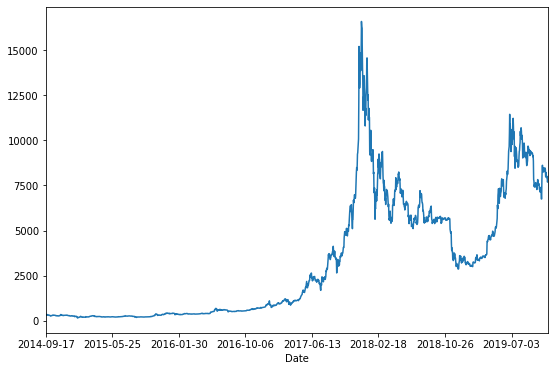

In [9]:
bitcoin['Close'].plot(figsize=(9,6))

In [10]:
bitcoin.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2019-11-08', '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12',
       '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17'],
      dtype='object', name='Date', length=1888)

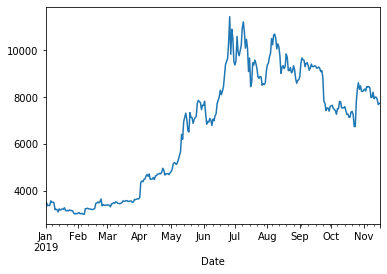

In [14]:
bitcoin['2019']['Close'].plot()

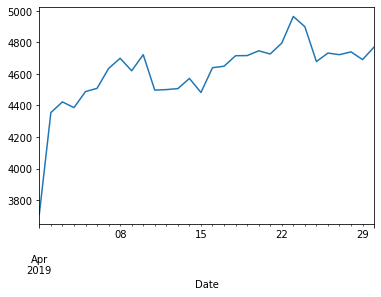

In [17]:
bitcoin['2019-04']['Close'].plot()

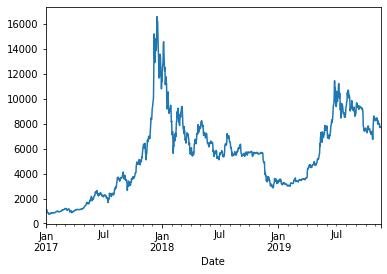

In [19]:
bitcoin['2017':'2019']['Close'].plot()

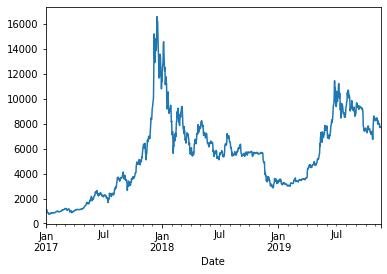

In [23]:
bitcoin.loc['2017':'2019','Close'].plot()

Date
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

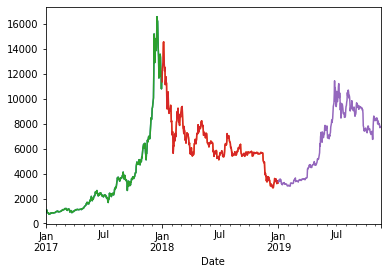

In [25]:
#use resample to group data by period( here we use year)
bitcoin.loc['2017':'2019','Close'].resample('Y').plot()
plt.show()

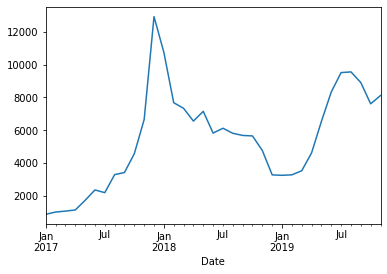

In [26]:
#use resample to group data by period( here we use year) and compute the mean 
bitcoin.loc['2017':'2019','Close'].resample('M').mean().plot()
plt.show()

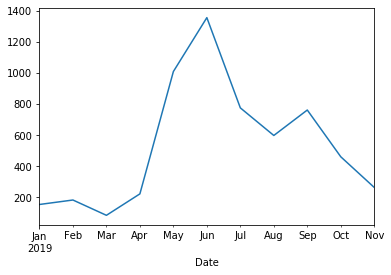

In [28]:
#use resample to group data by period( here we use year) and compute the standard deviation (volatilité du bitcoin) 
bitcoin.loc['2019','Close'].resample('M').std().plot()
plt.show()

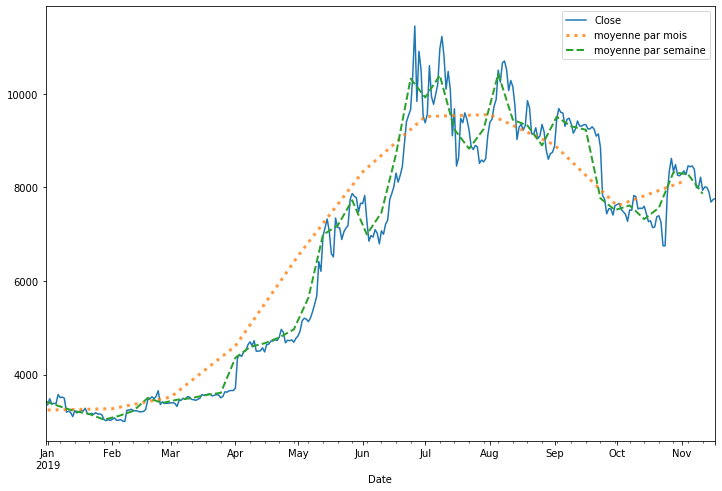

In [39]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin['2019']['Close'].resample('M').mean().plot(label="moyenne par mois",lw=3,ls=':',alpha=0.8)
bitcoin['2019']['Close'].resample('W').mean().plot(label="moyenne par semaine",lw=2,ls='--')
#bitcoin['2019']['close'].resample('2W').mean().plot(label="moyenne par deux semaines")
plt.legend()
plt.show()

In [43]:
# aggregate function
bitcoin['2019']['Close'].resample('M').agg(['mean','std','min','max'])

,mean,std,min,max
Date,,,,
2019-01-31,3241.492786,154.675614,3015.454102,3572.601807
2019-02-28,3270.404367,183.437120,2998.157227,3653.833008
2019-03-31,3518.958677,84.929101,3317.817383,3659.444824
2019-04-30,4609.844377,222.918594,3710.858154,4964.707031
2019-05-31,6532.714403,1010.175947,4823.619629,7866.871094
2019-06-30,8327.527637,1357.107430,6791.208984,11443.038086
2019-07-31,9511.153604,776.404643,8452.749023,11221.008789
2019-08-31,9552.757151,598.797179,8598.343750,10697.322266
2019-09-30,8902.757308,762.564631,7405.604980,9681.073242


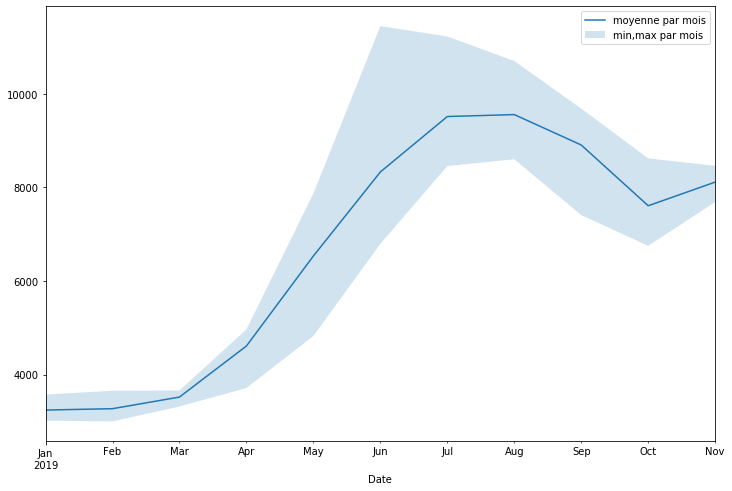

In [47]:
m=bitcoin['2019']['Close'].resample('M').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label="moyenne par mois")
plt.fill_between(m.index,m['max'],m['min'],alpha=0.2,label='min,max par mois')
plt.legend()
plt.show()

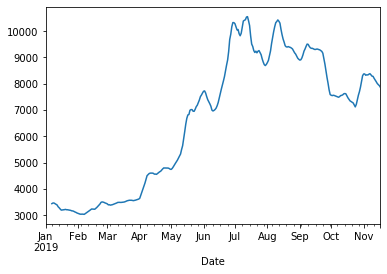

In [50]:
#moving average (it consists to compute the average between a specific period)
bitcoin['2019']['Close'].rolling(window=7).mean().plot()


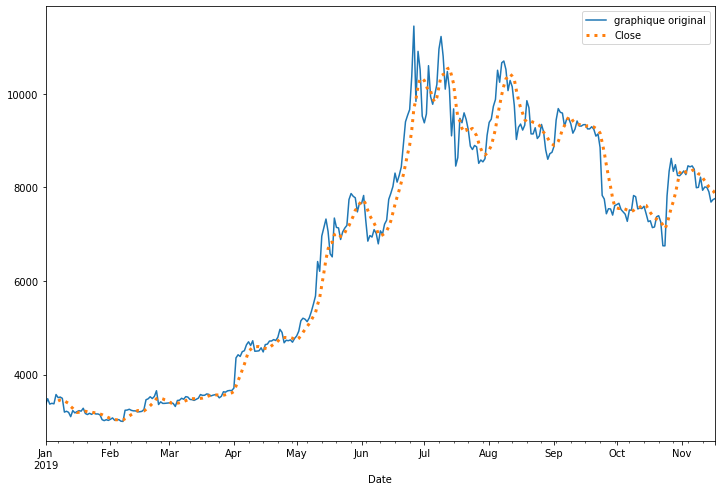

In [56]:
plt.figure(figsize=(12,8))
bitcoin['2019']['Close'].plot(label="graphique original")
bitcoin['2019']['Close'].rolling(window=7).mean().plot(ls=':',lw=3)
plt.legend()
plt.show()

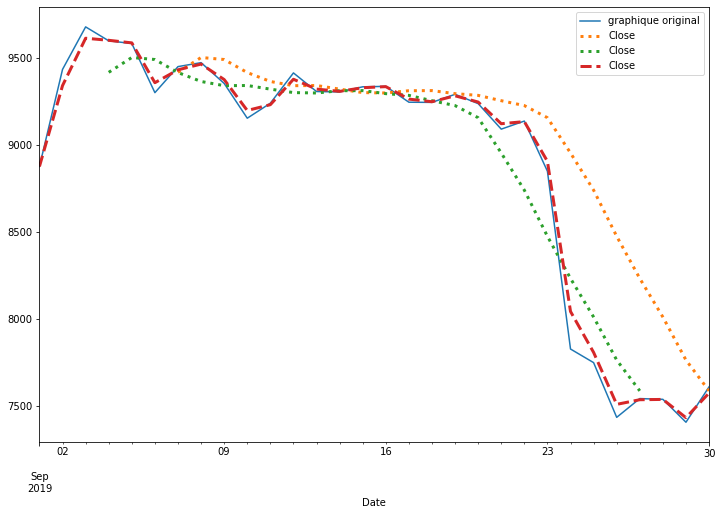

In [62]:
#moving average begin in september
plt.figure(figsize=(12,8))
bitcoin['2019-09']['Close'].plot(label="graphique original")
bitcoin['2019-09']['Close'].rolling(window=7).mean().plot(ls=':',lw=3)
bitcoin['2019-09']['Close'].rolling(window=7,center=True).mean().plot(ls=':',lw=3)
#exponential weight moving average
bitcoin['2019-09']['Close'].ewm(alpha=0.8).mean().plot(ls='--',lw=3)

plt.legend()
plt.show()

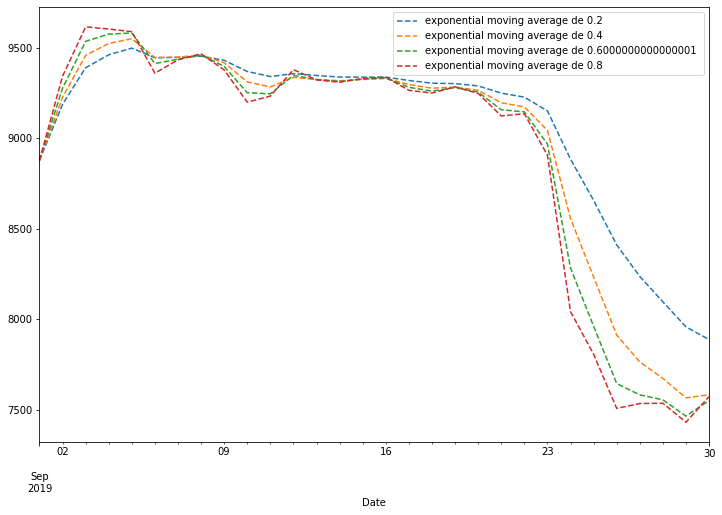

In [70]:
#using loop to plot figure with ewm (exponantial weight moving average)
plt.figure(figsize=(12,8))
for i in np.arange(0.2,1,0.2):
    bitcoin['2019-09']['Close'].ewm(alpha=i).mean().plot(label="exponential moving average de {} ".format(i),ls='--')


plt.legend()
plt.show()


In [65]:
np.arange(0.2,1,0.2)

array([0.2, 0.4, 0.6, 0.8])

In [95]:
#comparer bitcoin et ethereum
etherium=pd.read_csv("C:/Users/Bernardos/Documents/gnof_data/ETH-EUR.csv",index_col='Date',parse_dates=True)
data_merge=pd.merge(bitcoin,etherium,on='Date',how='inner',suffixes=('_btc','_eth'))
data_merge.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2018-11-20,4246.361816,4325.117676,3758.260498,3914.934326,3914.934326,7411762371,129.916611,132.116013,111.134506,114.618942,114.618942,2756371944
2018-11-21,3926.268066,4108.708984,3821.099365,4041.602783,4041.602783,5374658783,115.304901,122.046951,110.619759,120.050133,120.050133,2358770296
2018-11-22,4049.931396,4064.772949,3828.334473,3828.597656,3828.597656,4006990217,120.148926,120.934204,111.111534,111.111534,111.111534,1571579346
2018-11-23,3824.002441,3863.336426,3676.019775,3833.607666,3833.607666,4296045243,110.859856,111.401398,105.486427,108.731659,108.731659,1761995068
2018-11-24,3834.119141,3891.793701,3346.856689,3422.345215,3422.345215,4126734062,108.738716,111.811165,97.733795,100.087524,100.087524,1588221600


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E071F31C88>,
      dtype=object)

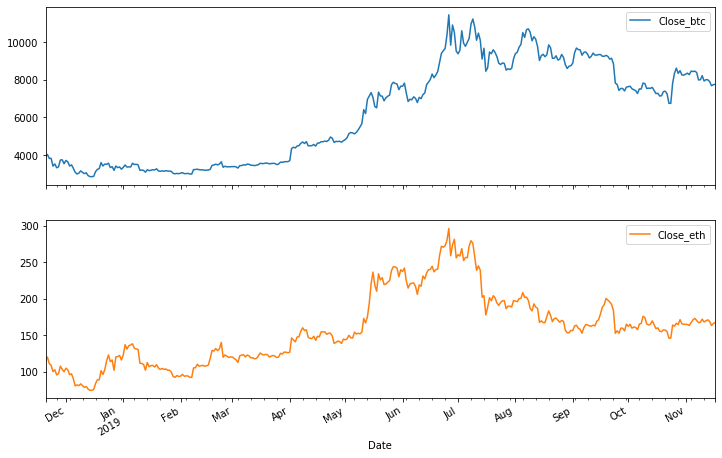

In [100]:
data_merge[['Close_btc','Close_eth']].plot(subplots=True,figsize=(12,8))

In [103]:
correlations=data_merge[['Close_btc','Close_eth']]['2019-09'].corr()
correlations

,Close_btc,Close_eth
Close_btc,1.000000,0.342536
Close_eth,0.342536,1.000000


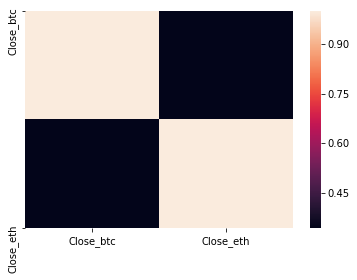

In [105]:
import seaborn as sns
sns.heatmap(correlations)

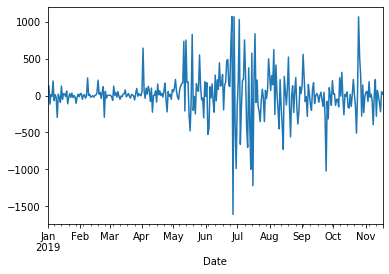

In [109]:
#
bitcoin['Close']['2019'].diff().plot()
